In [1]:
import sys
import os
import json
import regex as re

In [2]:
def load_instructions(filename):
    with open(filename) as f:
        if filename.endswith('jsonl'):
            data = []
            for line in f:
                data.append(json.loads(line.strip()))
        else:
            data = json.load(f)
    
    instructions = []
    for sample in data:
        if 'synthesized' in filename:
            instruction = sample['original_instruction']
        elif 'alpaca' in filename.lower():
            instruction = sample['instruction'].split('>>>')[0].strip() + '\n    """'
        else:
            instruction = sample['prompt']
            instruction = re.split("(?:example|for example|>>>)", instruction, flags=re.I)[0].strip() + '\n    """'
        
        instructions.append(instruction)
        
    return instructions

In [3]:
real = load_instructions('humaneval.jsonl')
syn = load_instructions('../../data/ada-instruct/humaneval_synthesized_6.4k.jsonl')
alpaca = load_instructions('../../data/alpaca/humaneval_alpaca_1k.jsonl')

In [4]:
from collections import Counter
from nltk.tokenize import word_tokenize

def count_length(instructions):
    counter = Counter()
    for inst in instructions:
        counter[len(word_tokenize(inst))] += 1
    return counter

def avg_length(counter):
    l = 0
    n = 0
    for k, v in counter.items():
        l += k * v
        n += v
    return l / n

In [5]:
len_real = count_length(real)
print("real avg_length:", avg_length(len_real))

real avg_length: 65.40853658536585


In [6]:
len_syn = count_length(syn)
print("syn avg_length:", avg_length(len_syn))

syn avg_length: 62.55616224648986


In [7]:
len_alpaca = count_length(alpaca)
print("alpaca avg_length:", avg_length(len_alpaca))

alpaca avg_length: 40.864222001982164


In [8]:
len_real = [len(word_tokenize(inst)) for inst in real]
len_syn = [len(word_tokenize(inst)) for inst in syn]
len_alpaca = [len(word_tokenize(inst)) for inst in alpaca]

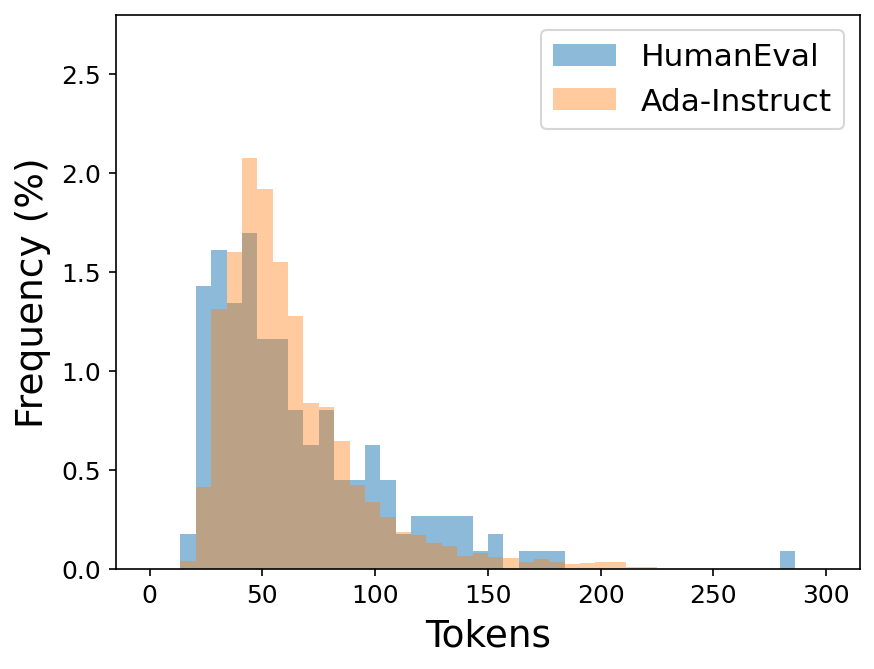

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(dpi=150)
bins = np.linspace(0, 300, 45)
plt.hist(len_real, bins, density=True, alpha=0.5, label='HumanEval')
plt.hist(len_syn, bins, density=True, alpha=0.4, label='Ada-Instruct')
plt.xticks(size=12)
plt.yticks(size=12)
# plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1,decimals=1))
plt.gca().yaxis.set_major_formatter(lambda y, pos: round(100 * y, 1))
plt.ylim(0, 0.028)
plt.xlabel("Tokens", fontdict={'size': 18}, labelpad=5)
plt.ylabel("Frequency (%)", fontdict={'size': 18}, labelpad=5)
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

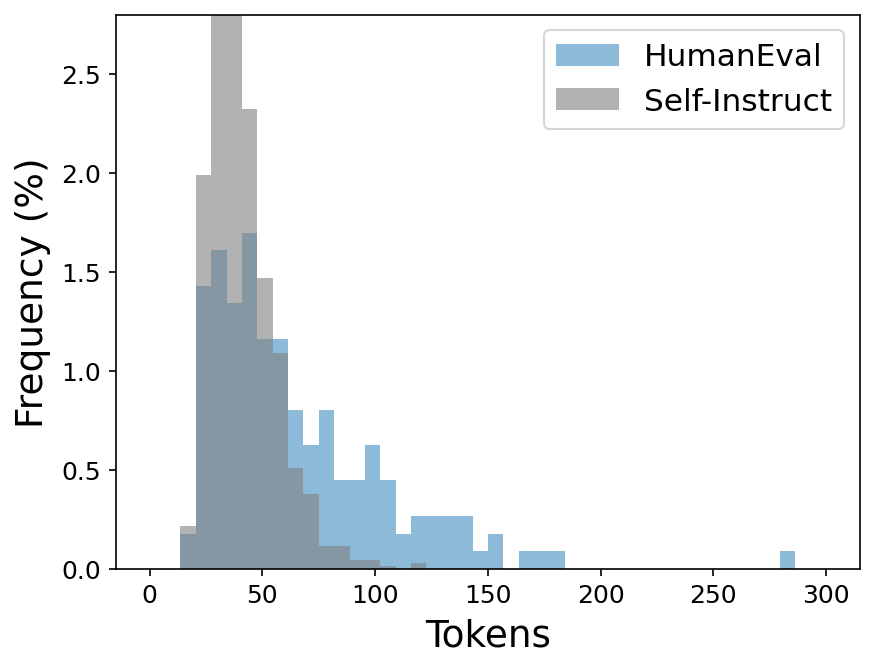

In [10]:
fig = plt.figure(dpi=150)
bins = np.linspace(0, 300, 45)
plt.hist(len_real, bins, density=True, alpha=0.5, label='HumanEval')
plt.hist(len_alpaca, bins, density=True, alpha=0.6, label='Self-Instruct', color='gray')
plt.xticks(size=12)
plt.yticks(size=12)
# plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1, decimals=1))
plt.gca().yaxis.set_major_formatter(lambda y, pos: round(100 * y, 1))
plt.ylim(0, 0.028)
plt.xlabel("Tokens", fontdict={'size': 18}, labelpad=5)
plt.ylabel("Frequency (%)", fontdict={'size': 18}, labelpad=5)
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

In [11]:
def load_instructions(filename):
    with open(filename) as f:
        if filename.endswith('jsonl'):
            data = []
            for line in f:
                data.append(json.loads(line.strip()))
        else:
            data = json.load(f)
    
    instructions = []
    for sample in data:
        if 'synthesized' in filename:
            instruction = sample['original_instruction']
        elif 'alpaca' in filename.lower():
            instruction = sample['instruction']
        else:
            instruction = sample['question']
        
        instructions.append(instruction)
        
    return instructions

In [12]:
real = load_instructions('gsm8k_train.jsonl')
syn = load_instructions('../../data/ada-instruct/gsm8k_synthesized_10k.jsonl')
alpaca = load_instructions('../../data/alpaca/gsm8k_alpaca_10k.jsonl')

In [13]:
len_real = count_length(real)
print("real avg_length:", avg_length(len_real))

real avg_length: 51.26696105981534


In [14]:
len_syn = count_length(syn)
print("syn avg_length:", avg_length(len_syn))

syn avg_length: 47.73168049585124


In [15]:
len_alpaca = count_length(alpaca)
print("alpaca avg_length:", avg_length(len_alpaca))

alpaca avg_length: 27.519892312294346


In [16]:
len_real = [len(word_tokenize(inst)) for inst in real]
len_syn = [len(word_tokenize(inst)) for inst in syn]
len_alpaca = [len(word_tokenize(inst)) for inst in alpaca]

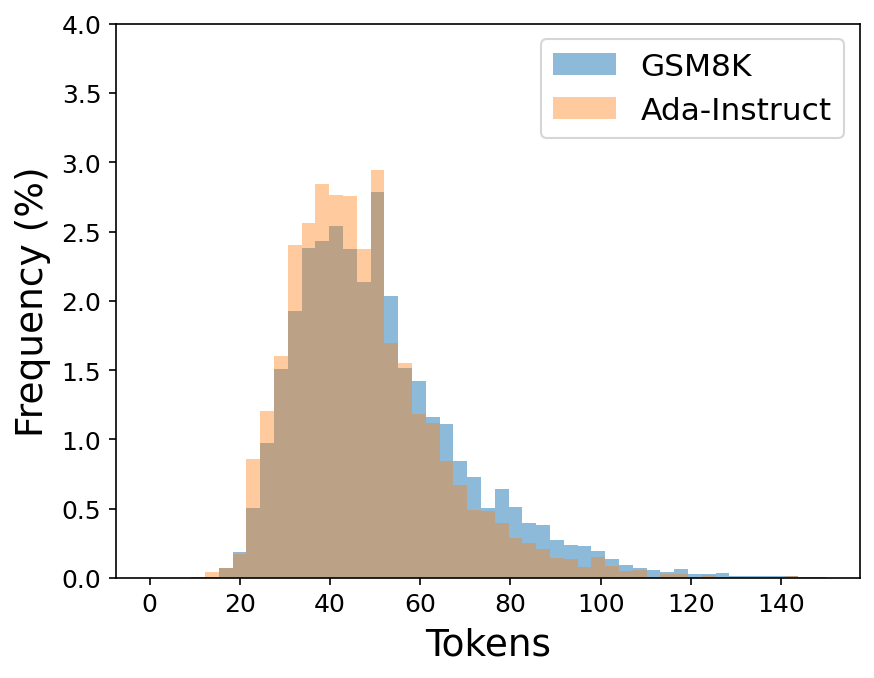

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(dpi=150)
bins = np.linspace(0, 150, 50)
plt.hist(len_real, bins, density=True, alpha=0.5, label='GSM8K')
plt.hist(len_syn, bins, density=True, alpha=0.4, label='Ada-Instruct')
plt.xticks(size=12)
plt.yticks(size=12)
# plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1,decimals=1))
plt.gca().yaxis.set_major_formatter(lambda y, pos: round(100 * y, 1))
plt.ylim(0, 0.04)
plt.xlabel("Tokens", fontdict={'size': 18}, labelpad=5)
plt.ylabel("Frequency (%)", fontdict={'size': 18}, labelpad=5)
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

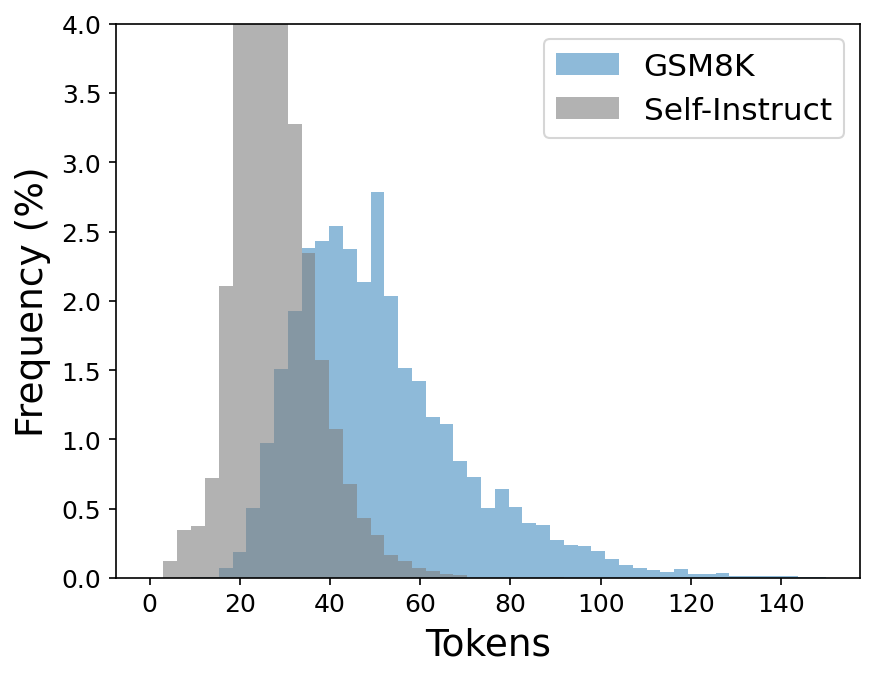

In [18]:
fig = plt.figure(dpi=150)
bins = np.linspace(0, 150, 50)
plt.hist(len_real, bins, density=True, alpha=0.5, label='GSM8K')
plt.hist(len_alpaca, bins, density=True, alpha=0.6, label='Self-Instruct', color='gray')
plt.xticks(size=12)
plt.yticks(size=12)
# plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1, decimals=1))
plt.gca().yaxis.set_major_formatter(lambda y, pos: round(100 * y, 1))
plt.ylim(0, 0.04)
plt.xlabel("Tokens", fontdict={'size': 18}, labelpad=5)
plt.ylabel("Frequency (%)", fontdict={'size': 18}, labelpad=5)
plt.legend(loc='upper right', prop={'size': 15})
plt.show()